--------------------------------------------------- Part 2 -----------------------------------------30 Marks

In [70]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns



from sklearn.model_selection import train_test_split

import numpy as np
import os,sys
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

# calculate accuracy measures and confusion matrix
from sklearn import metrics

## Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate

In [71]:
df_1 = pd.read_csv("Data1.csv")
df_2= pd.read_csv("Data2.csv")

In [72]:
df_1.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [73]:
df_2.head()

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


##  Data1 & Date 2 has different set of columns, we need to combaine both data columns with ID features

##  Print shape and Column Names and DataTypes of both the Dataframes

In [74]:
df_1.shape

(5000, 8)

In [75]:
df_1.columns

Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level'],
      dtype='object')

In [76]:
df_2.shape

(5000, 7)

In [77]:
df_2.columns

Index(['ID', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking',
       'CreditCard', 'LoanOnCard'],
      dtype='object')

##  Merge both the Dataframes on ‘ID’ feature to form a single DataFrame

In [78]:
df=df_1.merge(df_2, on='ID')

In [79]:
df.shape

(5000, 14)

In [80]:
df.columns

Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level', 'Mortgage', 'Security',
       'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard'],
      dtype='object')

In [81]:
df.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


Dataframe row counts remains the same and the number of features increased to 14 on merging two dataframes

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 585.9 KB


##  Change Datatype of below features to ‘Object’

In [83]:
col=['HiddenScore','Level','Security','FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard']
for i in col:
    df[i]=df[i].astype('object')

In [84]:
df.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore             object
MonthlyAverageSpend    float64
Level                   object
Mortgage                 int64
Security                object
FixedDepositAccount     object
InternetBanking         object
CreditCard              object
LoanOnCard              object
dtype: object

In [85]:
df['LoanOnCard'].value_counts()

0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanOnCard', ylabel='count'>

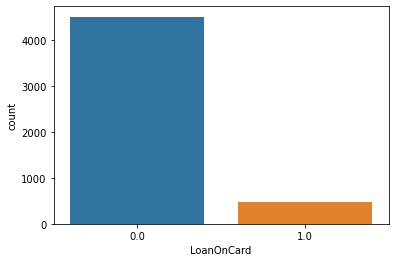

In [86]:
sns.countplot(df['LoanOnCard'])


### There is imbalance in Target variable with almost 90% data in 0 and 10% data in 1.

##  Check the percentage of missing values and impute if required

In [87]:
df.isnull().mean() * 100

ID                     0.0
Age                    0.0
CustomerSince          0.0
HighestSpend           0.0
ZipCode                0.0
HiddenScore            0.0
MonthlyAverageSpend    0.0
Level                  0.0
Mortgage               0.0
Security               0.0
FixedDepositAccount    0.0
InternetBanking        0.0
CreditCard             0.0
LoanOnCard             0.4
dtype: float64

In [88]:
df.dropna(axis=0,inplace=True)

In [89]:
df.isnull().mean() * 100

ID                     0.0
Age                    0.0
CustomerSince          0.0
HighestSpend           0.0
ZipCode                0.0
HiddenScore            0.0
MonthlyAverageSpend    0.0
Level                  0.0
Mortgage               0.0
Security               0.0
FixedDepositAccount    0.0
InternetBanking        0.0
CreditCard             0.0
LoanOnCard             0.0
dtype: float64

###  Missing values have been dropped and formated the dataset with right datatypes

## Data Preparation and model building: 10

##  Split data into X and Y

In [24]:
col=[ 'LoanOnCard']
for i in col:
    df[i]=df[i].astype('category')

In [25]:
X = df.drop('LoanOnCard', axis=1)
Y = df[['LoanOnCard']]

In [26]:
#Convert categorical vriables to dummy variables
X = pd.get_dummies(X, drop_first=True)

In [27]:
X.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,MonthlyAverageSpend,Mortgage,HiddenScore_2,HiddenScore_3,HiddenScore_4,Level_2,Level_3,Security_1,FixedDepositAccount_1,InternetBanking_1,CreditCard_1
9,10,34,9,180,93023,8.9,0,0,0,0,0,1,0,0,0,0
10,11,65,39,105,94710,2.4,0,0,0,1,0,1,0,0,0,0
11,12,29,5,45,90277,0.1,0,0,1,0,1,0,0,0,1,0
12,13,48,23,114,93106,3.8,0,1,0,0,0,1,1,0,0,0
13,14,59,32,40,94920,2.5,0,0,0,1,1,0,0,0,1,0


## Split data into train and test. Keep 25% data reserved for testing

In [28]:
##Split into training and test set


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25,random_state=42)

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
#Build the logistic regression model
logreg = LogisticRegression(max_iter=1000)

In [31]:
logreg.fit(X_train, y_train.values.ravel())

LogisticRegression(max_iter=1000)

In [32]:
#Predict for test set
pred_test = logreg.predict(X_test)

In [33]:
pred_test

array([0., 0., 0., ..., 0., 0., 0.])

In [34]:
#Predict for train set
pred_train = logreg.predict(X_train)

##  Print evaluation metrics for the model and clearly share insights. [

In [35]:
from sklearn.metrics import accuracy_score
test_accuracy=accuracy_score(y_test, pred_test)

print('Test Accuracy: ',np.round(test_accuracy,2))

Test Accuracy:  0.9


In [36]:
train_accuracy=accuracy_score(y_train, pred_train)

print('Test Accuracy: ',np.round(train_accuracy,2))

Test Accuracy:  0.91


In [37]:
from sklearn.metrics import classification_report,confusion_matrix
mat_train = confusion_matrix(y_train,pred_train)

print("confusion matrix_train_data = \n",mat_train)

confusion matrix_train_data = 
 [[3270  102]
 [ 238  125]]


In [38]:
mat_test = confusion_matrix(y_test,pred_test)
print("confusion matrix_test_data = \n",mat_test)

confusion matrix_test_data = 
 [[1091   37]
 [  82   35]]


## Balance the data using the right balancing technique

In [39]:
sample_data=pd.concat([df[df['LoanOnCard']==0].sample(480),df[df['LoanOnCard']==1]])
df_sample = sample_data.drop(['Security','InternetBanking','CreditCard','Age','CustomerSince','ZipCode'], axis=1)
X1=df_sample.drop('LoanOnCard', axis=1)
y1=df_sample['LoanOnCard']

In [40]:
X1.shape

(960, 7)

In [41]:
y1.shape

(960,)

In [42]:
y1.value_counts()

0.0    480
1.0    480
Name: LoanOnCard, dtype: int64

imbalance in the dataset has been handled with downsampling thing data. there are other techiniques like SMOTE oversampling & downsampling techinques ect. i have planned to go with manual sampling based the course

##  Again train the same previous model on balanced data

In [46]:
# Split X and y into training and test set in 75:25 ratio
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.25, random_state=10)

In [47]:
logreg.fit(X_train1, y_train1)
pred=logreg.predict(X_test1)

##   Print evaluation metrics and clearly share differences observed

 Test Accuracy score:89.58 %
              precision    recall  f1-score   support

         0.0       0.92      0.88      0.90       127
         1.0       0.87      0.91      0.89       113

    accuracy                           0.90       240
   macro avg       0.90      0.90      0.90       240
weighted avg       0.90      0.90      0.90       240



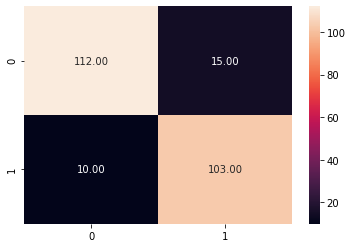

In [48]:
print(" Test Accuracy score:{:.2f} %".format(accuracy_score(y_test1, pred)*100))

sns.heatmap(confusion_matrix(y_test1, pred), annot=True, fmt='.2f')
print(classification_report(y_test1,pred))

Though the accuracy score is reduced to 89.58%, we can say that the model is peforming well in balanced data

Comparing with the imbalanced dataset, the balanced dataset perform better with high precission value. However, there are room for improvements to reduce the False Negative. Lets try with different modeling technique

##  4. Performance Improvement: 10

## Train a base model each for SVM, KNN

##  SVM

In [49]:
clf = svm.SVC(gamma=0.025, C=3) 

In [50]:
clf.fit(X_train , y_train)

SVC(C=3, gamma=0.025)

In [57]:
y_pred = clf.predict(X_test)
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

## KNN

In [61]:
KNN = KNeighborsClassifier(n_neighbors= 5 , metric = 'euclidean' ) #Building knn with 5 neighbors

In [62]:
KNN.fit(X_train, y_train)
predicted_labels = KNN.predict(X_test)

In [63]:
print('Accuracy on Training data:',KNN.score(X_train, y_train) )
print('Accuracy on Test data:',KNN.score(X_test, y_test) )

Accuracy on Training data: 0.8805555555555555
Accuracy on Test data: 0.8458333333333333


## Tune parameters/hyperparameters for each of the models wherever required and finalize a
model

In [64]:
train_score=[]
test_score=[]
for k in range(1,51):
    KNN = KNeighborsClassifier(n_neighbors= k , metric = 'euclidean' ) 
    KNN.fit(X_train, y_train)
    train_score.append(KNN.score(X_train, y_train))
    test_score.append(KNN.score(X_test, y_test))

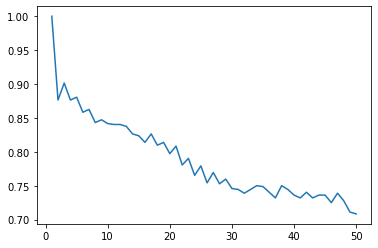

In [65]:
plt.plot(range(1,51),train_score)
plt.show()

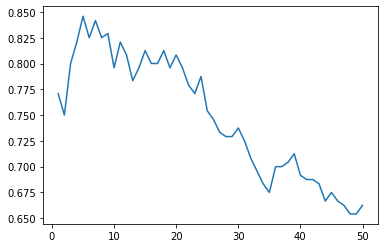

In [66]:
plt.plot(range(1,51),test_score)
plt.show()

In [67]:
k=[1,3,5,7,9,11,12,13]
for i in k:
    KNN = KNeighborsClassifier(n_neighbors=i, metric = 'euclidean' ) #Building knn with 5 neighbors
    KNN.fit(X_train, y_train)
    predicted_labels = KNN.predict(X_test)
    print('Accuracy on Training data for k {} is {}:'.format(i,KNN.score(X_train, y_train)))
    print('Accuracy on Test data for k {} is {}:'.format(i,KNN.score(X_test, y_test)))
    print("classification  Matrix:\n",classification_report(y_test,predicted_labels))

Accuracy on Training data for k 1 is 1.0:
Accuracy on Test data for k 1 is 0.7708333333333334:
classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.83      0.72      0.77       127
         1.0       0.72      0.83      0.77       113

    accuracy                           0.77       240
   macro avg       0.78      0.77      0.77       240
weighted avg       0.78      0.77      0.77       240

Accuracy on Training data for k 3 is 0.9013888888888889:
Accuracy on Test data for k 3 is 0.8:
classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.88      0.72      0.79       127
         1.0       0.74      0.89      0.81       113

    accuracy                           0.80       240
   macro avg       0.81      0.81      0.80       240
weighted avg       0.81      0.80      0.80       240

Accuracy on Training data for k 5 is 0.8805555555555555:
Accuracy on Test data for k 5 is 0.84583333333333

K= 1 is good but it will be overfit so we are taking K=3

## Print evaluation metrics for final model

In [68]:
print("classification  Matrix:\n",classification_report(y_test,predicted_labels))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.84      0.73      0.78       127
         1.0       0.74      0.84      0.79       113

    accuracy                           0.78       240
   macro avg       0.79      0.79      0.78       240
weighted avg       0.79      0.78      0.78       240



##  Share improvement achieved from base model to final model. 

 i would prefer to choose Logistic regression (balanced data)  as model.

Overfitting is less is Logistic regress

precision & recall values are better predicting the protential customers